<a href="https://colab.research.google.com/github/joamho-luiz/Trabalho-FMC/blob/main/Imagem_Precipita%C3%A7%C3%A3o_Sudaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instações e Importações

In [ ]:
!pip install cartopy
!pip install --upgrade  xarray zarr gcsfs cftime nc-time-axis 
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import gcsfs
import cartopy.crs as ccrs
from matplotlib.axes import Axes
xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 12, 6
fig = plt.figure(figsize=(15, 8))

# Carregar dados utilizados

## _Execute apenas o modelo que for utilizar_
\> > Você só precisa definir os modelos aqui:

In [ ]:
# EC:
institution_id = "EC-Earth-Consortium"      
source_id = "EC-Earth3"
experiment_id = "historical"
table_id = "Amon"
variable_id = "pr"

In [3]:
# E3:
institution_id = "E3SM-Project"
source_id = "E3SM-1-1"
experiment_id = "historical"
table_id = "Amon"
variable_id = "pr"

In [ ]:
# CN:
institution_id = "CNRM-CERFACS"
source_id = "CNRM-CM6-1"
experiment_id = "historical"
table_id = "Amon"
variable_id = "pr"

# Média da primeira metade do século 20

In [4]:
# Comente o que não deve ser definido
parametro = ""
parametro += f" & institution_id == '{institution_id}'" if parametro != "" else f"institution_id == '{institution_id}'"  
parametro += f" & source_id == '{source_id}'" if parametro != "" else f"source_id == '{source_id}'"  
parametro += f" & experiment_id == '{experiment_id}'" if parametro != "" else f"experiment_id == '{experiment_id}'"  
parametro += f" & table_id == '{table_id}'" if parametro != "" else f"table_id == '{table_id}'"  
parametro += f" & variable_id == '{variable_id}'" if parametro != "" else f"variable_id == '{variable_id}'"  
parametros = parametro

In [5]:
# Acessar dados.
lista_de_modelos = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
%load_ext google.colab.data_table

In [ ]:
seleccamho = lista_de_modelos.query(parametros)
seleccamho

In [ ]:
# isso só precisa ser criado uma vez
gcs = gcsfs.GCSFileSystem(token='anon')

# obter o caminho para um armazenamento zarr específico (o primeiro do dataframe acima)
zstore = seleccamho.zstore.values[-1]       #EC usamos -2
zstore
# criar uma interface de estilo de mapeamento mutável para a loja
mapper = gcs.get_mapper(zstore)

# abra usando xarray e zarr
ds = xr.open_zarr(mapper, consolidated=True)
df=ds.pr.to_dataframe()
df

In [8]:
med_br1_pr = ds.pr.sel(time=slice('1900','1950')).mean(dim='time') 

# Média da primeira metade do século 21

In [9]:
experiment_id = "ssp585"

parametro = ""
parametro += f" & institution_id == '{institution_id}'" if parametro != "" else f"institution_id == '{institution_id}'"  
parametro += f" & source_id == '{source_id}'" if parametro != "" else f"source_id == '{source_id}'"  
parametro += f" & experiment_id == '{experiment_id}'" if parametro != "" else f"experiment_id == '{experiment_id}'"  
parametro += f" & table_id == '{table_id}'" if parametro != "" else f"table_id == '{table_id}'"  
parametro += f" & variable_id == '{variable_id}'" if parametro != "" else f"variable_id == '{variable_id}'"  
parametros = parametro

seleccamho = lista_de_modelos.query(parametros)

In [ ]:
# isso só precisa ser criado uma vez
gcs = gcsfs.GCSFileSystem(token='anon')

# obter o caminho para um armazenamento zarr específico (o primeiro do dataframe acima)
zstore = seleccamho.zstore.values[-1]       #EC usamos -2
zstore
# criar uma interface de estilo de mapeamento mutável para a loja
mapper = gcs.get_mapper(zstore)

# abra usando xarray e zarr
ds = xr.open_zarr(mapper, consolidated=True)
df=ds.pr.to_dataframe()
df

In [11]:
med_br2_pr = ds.pr.sel(time=slice('2000','2050')).mean(dim='time') 

# Gerar Imagem

In [12]:
# Calcular a diferença:
diferencca_br_pr = med_br2_pr - med_br1_pr
diferencca_br_pr.values

array([[4.4518492e-07, 4.4518674e-07, 4.4518879e-07, ..., 4.4518879e-07,
        4.4518674e-07, 4.4518492e-07],
       [4.0751820e-07, 4.0754594e-07, 4.0760187e-07, ..., 4.0760187e-07,
        4.0754594e-07, 4.0751820e-07],
       [3.7845143e-07, 3.7846371e-07, 3.7848804e-07, ..., 3.7848804e-07,
        3.7846371e-07, 3.7845143e-07],
       ...,
       [2.6748889e-06, 2.6749267e-06, 2.6750085e-06, ..., 2.6750085e-06,
        2.6749267e-06, 2.6748889e-06],
       [2.6741172e-06, 2.6741000e-06, 2.6740727e-06, ..., 2.6740727e-06,
        2.6741000e-06, 2.6741172e-06],
       [2.6602238e-06, 2.6602279e-06, 2.6602320e-06, ..., 2.6602320e-06,
        2.6602279e-06, 2.6602238e-06]], dtype=float32)

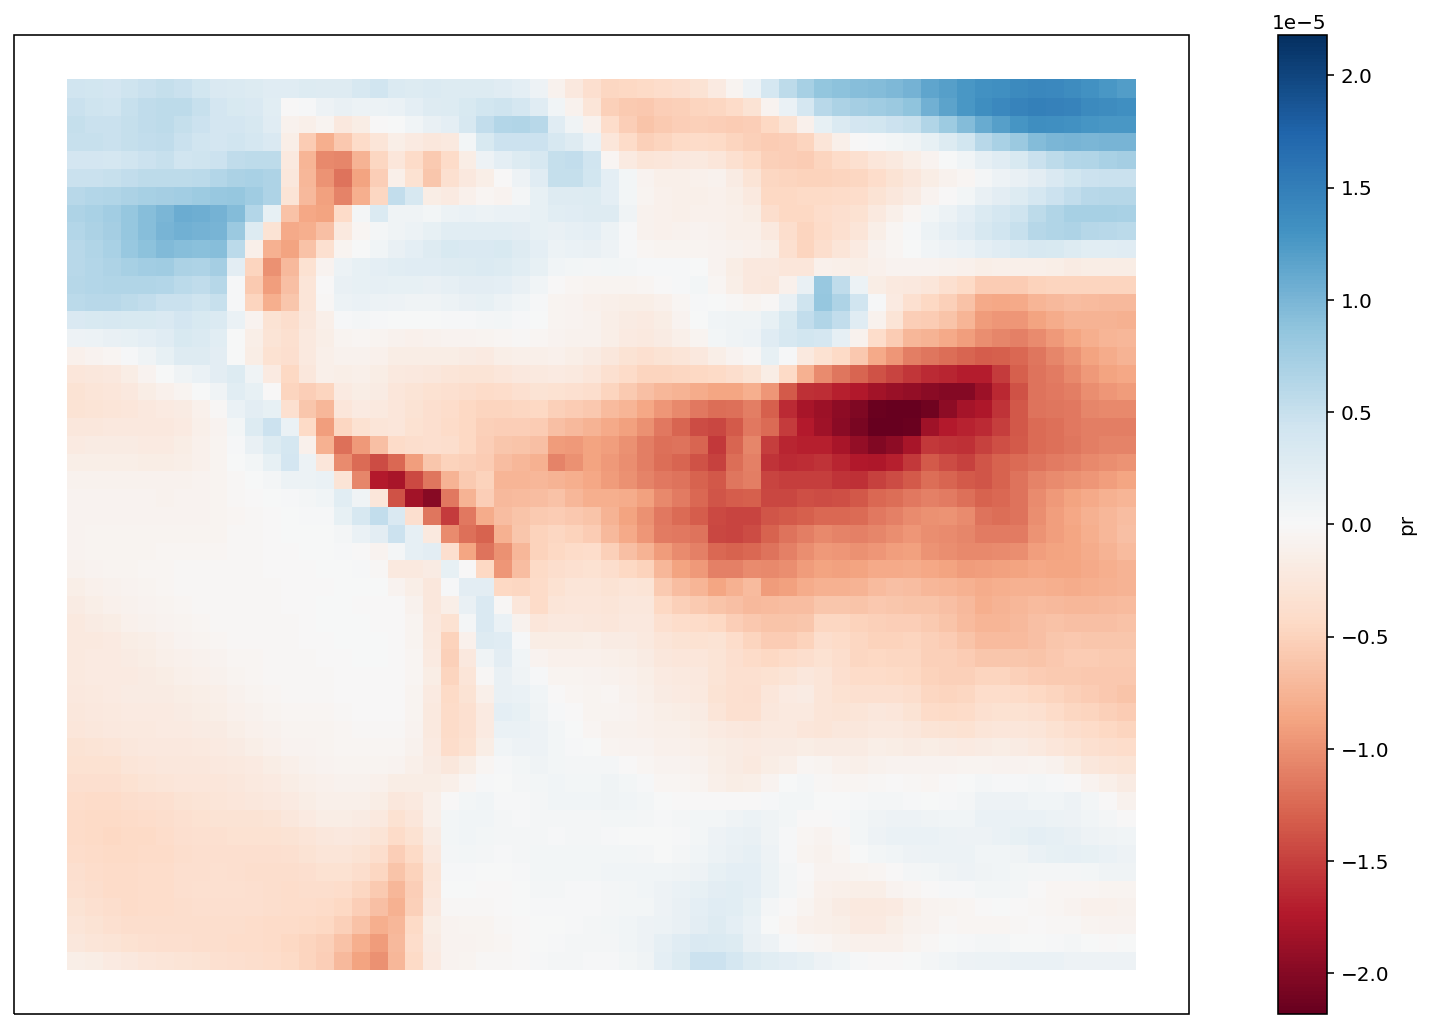

In [13]:
tair = diferencca_br_pr

# Recortar para América do sul
min_lon = -90.0
min_lat = -40.0
max_lon = -30.0
max_lat = 10
min_lon = min_lon+360
max_lon = max_lon+360
mask_lon = (ds.lon >= min_lon) & (ds.lon <= max_lon)
mask_lat = (ds.lat >= min_lat) & (ds.lat <= max_lat)
ams_tair = tair.where(mask_lon & mask_lat, drop=True)

fig = plt.figure(figsize=(16, 9))     

p=ams_tair.squeeze().plot(subplot_kws=dict(projection=ccrs.PlateCarree(central_longitude=-56.0)),
    transform=ccrs.PlateCarree(), cmap='RdBu' )  #viridis    hsc    YlGnBu      coolwarm      RdBu       Blues       seismic
type(p)

# Contorno das costas do continente # não funciona mais 
# p.axes.set_global()
# p.axes.coastlines()

plt.savefig(f'Precipitação - {institution_id}.png', dpi=500, bbox_inches='tight')  